In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
books = pd.read_csv('./data/books_final.csv')
author = pd.read_csv('./data/author_final.csv', index_col=0)

In [44]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [43]:
books.head(5)

,作品ID,作品名,人物ID,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名
1,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名
2,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名
3,60225,寡婦とその子,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,7042.0,年老いた人をいたわりなさい。その銀髪は、名誉と尊敬をつねに集めてきたのです。――マーロウ作「...,NDC 933,新字新仮名
4,60231,クリスマス,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,4953.0,だが、あのなつかしい、思い出ふかいクリスマスのお爺さんはもう逝ってしまったのだろうか。あとに...,NDC 933,新字新仮名


getting birthYear

In [10]:
author.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 0 to 1184
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1185 non-null   int64 
 1   author      1185 non-null   object
 2   birthDate   1131 non-null   object
 3   deathDate   1097 non-null   object
 4   gender      1175 non-null   object
 5   birthPlace  992 non-null    object
 6   last        1185 non-null   object
 7   first       1154 non-null   object
dtypes: int64(1), object(7)
memory usage: 83.3+ KB


In [24]:
def get_year(row):
    if pd.isnull(row):
        return None
    
    if '-' in row:
        return row[0: row.index('-', 1)] # starting at 1 as there are a few BC years that are represented as -[year]
    else: # only year is known
        return row

author['birthYear'] = author['birthDate'].apply(get_year)

In [27]:
np.unique_values(author['birthYear'].astype(str))

array(['-0427', '0700', '0973', '1008', '1048', '1153', '1265', '1283',
       '1341', '1452', '1483', '1533', '1546', '1596', '1608', '1628',
       '1640', '1642', '1659', '1667', '1694', '1695', '1711', '1734',
       '1735', '1743', '1748', '1749', '1757', '1761', '1765', '1766',
       '1769', '1770', '1771', '1772', '1776', '1783', '1785', '1786',
       '1796', '1797', '1799', '1801', '1802', '1803', '1804', '1805',
       '1807', '1809', '1810', '1811', '1812', '1813', '1814', '1816',
       '1817', '1818', '1820', '1821', '1823', '1824', '1826', '1828',
       '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836',
       '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
       '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869',
       '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877',
     

In [438]:
def get_author_age(row):
    print(row)
    if pd.isna(row['inception']) or pd.isna(author.loc[author['id'] == row['author_id'], 'birthYear']).values[0]:
        return np.nan
    
    print(row)
    
    author_birth = float(author[author['id'] == row['author_id']]['birthYear'])
    year_pub = float(row['inception'])

    age_at_publish = year_pub - author_birth
    return age_at_publish



In [64]:
nulls(books)

,cols,null_count,% null
0,inception,6807,38.948
1,分類番号,572,3.273
2,作品ID,0,0.000
3,人物ID,0,0.000
4,作品名,0,0.000
5,XHTML/HTMLファイルURL,0,0.000
6,char_count,0,0.000
7,text,0,0.000
8,文字遣い種別,0,0.000


In [441]:
merge.head(5)

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
33,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者,アークムフレデリック,1769.0,1838.0
35,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者,愛知敬一,1880.0,1923.0
36,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者,会津八一,1881.0,1956.0
37,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者,会津八一,1881.0,1956.0
38,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者,会津八一,1881.0,1956.0


In [ ]:
merge['authorAge'] = merge[['inception', 'author_id']].apply(get_author_age, axis=1)

inception       NaN
author_id    1657.0
Name: 33, dtype: float64
inception       NaN
author_id    1234.0
Name: 35, dtype: float64
inception       NaN
author_id    1245.0
Name: 36, dtype: float64
inception    1922.0
author_id    1245.0
Name: 37, dtype: float64
inception    1922.0
author_id    1245.0
Name: 37, dtype: float64
inception       NaN
author_id    1245.0
Name: 38, dtype: float64
inception       NaN
author_id    1245.0
Name: 39, dtype: float64
inception       NaN
author_id    1245.0
Name: 40, dtype: float64
inception    1924.0
author_id    1245.0
Name: 41, dtype: float64
inception    1924.0
author_id    1245.0
Name: 41, dtype: float64
inception    1922.0
author_id    1245.0
Name: 42, dtype: float64
inception    1922.0
author_id    1245.0
Name: 42, dtype: float64
inception    1952.0
author_id    1245.0
Name: 43, dtype: float64
inception    1952.0
author_id    1245.0
Name: 43, dtype: float64
inception    1948.0
author_id    1245.0
Name: 44, dtype: float64
inception    1948.0
autho

C:\Users\Jaden\AppData\Local\Temp\ipykernel_11140\4220596039.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  author_birth = float(author[author['id'] == row['author_id']]['birthYear'])


inception    1920.0
author_id     879.0
Name: 140, dtype: float64
inception    1919.0
author_id     879.0
Name: 141, dtype: float64
inception    1919.0
author_id     879.0
Name: 141, dtype: float64
inception    1918.0
author_id     879.0
Name: 142, dtype: float64
inception    1918.0
author_id     879.0
Name: 142, dtype: float64
inception    1927.0
author_id     879.0
Name: 143, dtype: float64
inception    1927.0
author_id     879.0
Name: 143, dtype: float64
inception      NaN
author_id    879.0
Name: 144, dtype: float64
inception      NaN
author_id    879.0
Name: 145, dtype: float64
inception      NaN
author_id    879.0
Name: 146, dtype: float64
inception    1920.0
author_id     879.0
Name: 147, dtype: float64
inception    1920.0
author_id     879.0
Name: 147, dtype: float64
inception    1917.0
author_id     879.0
Name: 148, dtype: float64
inception    1917.0
author_id     879.0
Name: 148, dtype: float64
inception      NaN
author_id    879.0
Name: 149, dtype: float64
inception      NaN

,cols,null_count,% null
0,authorAge,6796,39.125
1,inception,6721,38.693
2,category,569,3.276
3,deathYear,193,1.111
4,birthYear,131,0.754
5,id,0,0.000
6,char_count,0,0.000
7,url,0,0.000
8,author_id,0,0.000
9,title,0,0.000


In [80]:
author['deathYear'] = author['deathDate'].apply(get_year)

In [81]:
author.head(5)

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936


In [82]:
books = books.rename({'人物ID': 'id'}, axis=1)

In [90]:
merge = books.merge(author[['id', 'author', 'birthYear', 'deathYear']], how = 'left', on='id')

In [84]:
merge.head()

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,birthYear,deathYear
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,1783,1859
1,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,1783,1859
2,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,1783,1859
3,60225,寡婦とその子,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,7042.0,年老いた人をいたわりなさい。その銀髪は、名誉と尊敬をつねに集めてきたのです。――マーロウ作「...,NDC 933,新字新仮名,NaN,1783,1859
4,60231,クリスマス,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,4953.0,だが、あのなつかしい、思い出ふかいクリスマスのお爺さんはもう逝ってしまったのだろうか。あとに...,NDC 933,新字新仮名,NaN,1783,1859


In [91]:
impossible = merge['inception'] > merge['deathYear']

In [88]:
impossible.sum()

np.int64(243)

In [94]:
merge[impossible].head(10) 

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,author,birthYear,deathYear
9,60357,新浦島,1257,https://www.aozora.gr.jp/cards/001257/files/60...,1889,13988.0,「サクソンの畏き神に縁みてぞ、けふをば『ヱンスデイ』といふ。その神見ませ、よるよりも暗くさび...,NDC K933,新字旧仮名,106.0,アーヴィングワシントン,1783,1859
403,181,槍が岳に登った記,879,https://www.aozora.gr.jp/cards/000879/files/18...,1929,2538.0,赤沢雑木の暗い林を出ると案内者がここが赤沢ですと言った。暑さと疲れとで目のくらみかかった自分...,NDC 915,新字新仮名,37.0,芥川竜之介,1892,1927
457,55243,「黒瞳」より,1716,https://www.aozora.gr.jp/cards/001716/files/55...,1901,173.0,おくつきに跪きわが父の墳塋にとこしへの愛をわれにちかひぬ。汝もし操なくば一日たてし誓に願くば...,NDC 961,旧字旧仮名,68.0,アラルコンペドロ・アントニオ,1833,1891
491,4994,燕と王子,25,https://www.aozora.gr.jp/cards/000025/files/49...,1926,9293.0,燕という鳥は所をさだめず飛びまわる鳥で、暖かい所を見つけておひっこしをいたします。今は日本が...,NDC K913,新字新仮名,48.0,有島武郎,1878,1923
540,45183,一本足の兵隊,19,https://www.aozora.gr.jp/cards/000019/files/45...,1919,5351.0,一或小さなお坊ちやんが、お誕生日のお祝ひに、箱入りのおもちやをもらひました。坊ちやんは、さつ...,NDC K913,新字旧仮名,114.0,アンデルセンハンス・クリスチャン,1805,1875
694,48155,所謂今度の事,153,https://www.aozora.gr.jp/cards/000153/files/48...,1957,5835.0,（一）二三日前の事である。途で渇を覺えてとあるビイヤホオルに入ると、窓側の小さい卓を圍んで語...,NDC 914,旧字旧仮名,71.0,石川啄木,1886,1912
704,45462,雲は天才である,153,https://www.aozora.gr.jp/cards/000153/files/45...,1919,16054.0,一六月三十日、Ｓ――村尋常高等小学校の職員室では、今しも壁の掛時計が平常の如く極めて活気のな...,NDC 913,新字旧仮名,33.0,石川啄木,1886,1912
748,45470,二筋の血,153,https://www.aozora.gr.jp/cards/000153/files/45...,1919,11839.0,夢の様な幼少の時の追憶、喜びも悲みも罪のない事許り、それからそれと朧気に続いて、今になつては...,NDC 913,新字旧仮名,33.0,石川啄木,1886,1912
1116,56233,内気な娘とお転婆娘,416,https://www.aozora.gr.jp/cards/000416/files/56...,1925,6966.0,『女はしとやかでなくてはいけない、をとなしくなくてはいけない』と云ふ訓しへは甚だ結構な事です...,NDC 914,新字旧仮名,30.0,伊藤野枝,1895,1923
1340,60609,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1959,185413.0,凡例一本書は、安永五年（一七七六）刊、野梅堂版（京都梅村判兵衛・大坂野村長兵衛の合板）の初版...,NaN,新字新仮名,225.0,上田秋成,1734,1809


On close inspection, some of the works are actually released after the author's death, which makes it a bit ambiguous.

- one one hand, I think it still serves as a good representative of the 'times', 'era', and 'life' of the author... it feels like a waste to remove this, as there are many that are really soldi works.
- on the other hand, I think this can introduce noise to the algorithm, as we do not know exactly when this was written -- beyond the fact that it was released after their death.

In [104]:
author_role = pd.read_csv('./data/list_person_all_extended_utf8.csv', usecols=['作品ID', '役割フラグ'])

In [105]:
books_merged = books.merge(author_role, how='left', on='作品ID' )

<Axes: xlabel='count', ylabel='役割フラグ'>

d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33879 (\N{CJK UNIFIED IDEOGRAPH-8457}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32763 (\N{CJK UNIFIED IDEOGRAPH-7FFB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35379 (\N{CJK UNIFIED IDEOGRAPH-8A33}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32232 (\N{CJK UNIFIED IDEOGRAPH-7DE8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\e

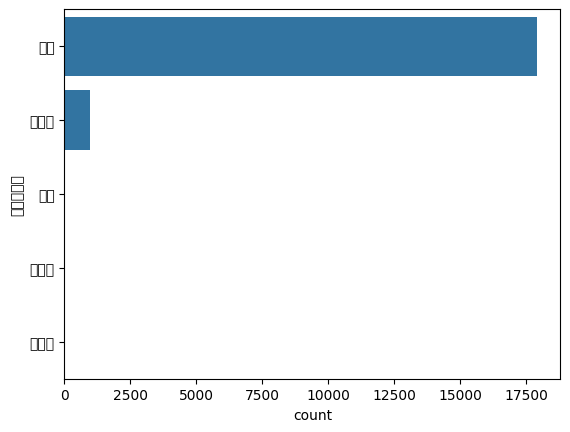

In [106]:
sns.countplot(books_merged['役割フラグ'])

In [135]:
merge = books_merged.merge(author[['id', 'author', 'birthYear', 'deathYear']], how = 'left', on='id')

In [114]:
impossible = (merge['inception'] > merge['deathYear']) & (merge['役割フラグ'] == '翻訳者')

In [118]:
len(merge[impossible])

24

In [123]:
idx = merge[impossible].index

idx

Index([   19,    20,   500,  1554,  1627,  1638,  4635,  6579,  6583,  8398,
        8399,  8942, 10605, 11108, 11110, 11111, 11588, 11589, 14617, 14618,
       14620, 14621, 14623, 14624],
      dtype='int64')

In [121]:
merge.loc[idx]['authorAge'].describe()

count     24.000000
mean     151.125000
std      179.790533
min       46.000000
25%       85.000000
50%      103.000000
75%      116.250000
max      784.000000
Name: authorAge, dtype: float64

In [136]:
merge = merge.drop(index=idx)

In [128]:
nulls(merge)

,cols,null_count,% null
0,authorAge,7869,41.646
1,inception,7721,40.863
2,分類番号,673,3.562
3,deathYear,368,1.948
4,birthYear,248,1.313
5,作品ID,0,0.000
6,char_count,0,0.000
7,XHTML/HTMLファイルURL,0,0.000
8,id,0,0.000
9,作品名,0,0.000


In [129]:
merge = merge.drop(columns=['deathYear', 'birthYear', 'author'])

In [130]:
merge.head(5)

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,役割フラグ
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,著者
1,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,翻訳者
2,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,著者
3,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,翻訳者
4,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,著者


In [151]:
merge = merge.rename(columns={'作品ID': 'id', '作品名': 'title', 'id': 'author_id', 'XHTML/HTMLファイルURL': 'url', '分類番号': 'category', '文字遣い種別': 'char_type', '役割フラグ': 'author_role'  })

In [483]:
merge.to_csv('./data/books_final.csv', header=True, index=False, encoding='utf-8')

### Seeing if I can do any null imputation.

1. authorAge / birthYear

In [144]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18895 entries, 0 to 18918
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   作品ID               18895 non-null  int64  
 1   作品名                18895 non-null  object 
 2   id                 18895 non-null  int64  
 3   XHTML/HTMLファイルURL  18895 non-null  object 
 4   inception          11174 non-null  object 
 5   char_count         18895 non-null  float64
 6   text               18895 non-null  object 
 7   分類番号               18222 non-null  object 
 8   文字遣い種別             18895 non-null  object 
 9   authorAge          11026 non-null  float64
 10  役割フラグ              18895 non-null  object 
 11  author             18895 non-null  object 
 12  birthYear          18647 non-null  object 
 13  deathYear          18527 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.2+ MB


In [147]:
merge['birthYear'] = merge['birthYear'].astype(float)
merge['deathYear'] = merge['deathYear'].astype(float)

In [148]:
#### Seeing if there is correlation b/w author age and time period that author is alive.

merge.corr(numeric_only=True)

,作品ID,id,char_count,authorAge,birthYear,deathYear
作品ID,1.000000,0.525412,-0.033193,0.120407,0.092434,0.129696
id,0.525412,1.000000,0.047732,0.185189,0.088554,0.160874
char_count,-0.033193,0.047732,1.000000,0.048331,-0.032227,-0.033619
authorAge,0.120407,0.185189,0.048331,1.000000,-0.542208,-0.123908
birthYear,0.092434,0.088554,-0.032227,-0.542208,1.000000,0.975991
deathYear,0.129696,0.160874,-0.033619,-0.123908,0.975991,1.000000


`birthYear` is the most correlated with `authorAge`. Due to a negative r, we might be able to interpret that a more modern era leads to younger and younger authors.

To confirm this, I will find the age of each author when they wrote their first work. This will lead to less autocorrelation.

In [149]:
author

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936
...,...,...,...,...,...,...,...,...,...,...
1180,1515,山本政喜,1899-04-20,1960-04-07,male,Japan,山本,政喜,1899,1960
1181,1858,山本和久三,1893,1932,male,Japan,山本,和久三,1893,1932
1182,2157,吉岡信敬,1885-09-01,1940-12-07,male,Japan,吉岡,信敬,1885,1940
1183,2245,和田信賢,1912-06-19,1952-08-14,male,Japan,和田,信賢,1912,1952


In [152]:
merge

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
1,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,翻訳者,アーヴィングワシントン,1783.0,1859.0
2,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
3,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,翻訳者,アーヴィングワシントン,1783.0,1859.0
4,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,49911,面とペルソナ,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1935,4761.0,問題にしない時にはわかり切ったことと思われているものが、さて問題にしてみると実にわからなくな...,NDC 121,新字新仮名,46.0,著者,和辻哲郎,1889.0,1960.0
18915,55622,夢,1395,https://www.aozora.gr.jp/cards/001395/files/55...,1952,12400.0,夢の話をするのはあまり気のきいたことではない。確か痴人夢を説くという言葉があったはずだ。そう...,NDC 121,新字新仮名,63.0,著者,和辻哲郎,1889.0,1960.0
18916,49876,『劉生画集及芸術観』について,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1921,4655.0,自分は現代の画家中に岸田君ほど明らかな「成長」を示している人を知らない。誇張でなく岸田君は一...,NDC 723 914,新字新仮名,32.0,著者,和辻哲郎,1889.0,1960.0
18917,49913,霊的本能主義,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1907,12075.0,一荒漠たる秋の野に立つ。星は月の御座を囲み月は清らかに地の花を輝らす。花は紅と咲き黄と匂い紫...,NDC 121,新字新仮名,18.0,著者,和辻哲郎,1889.0,1960.0


In [ ]:
# remove authors with no records in the books dataset.

In [474]:
len(merge['author_id'].unique()), len(np.unique_values(author['id']))

(951, 951)

In [176]:
authors_with_no_works = set(np.unique_values(author['id'])) - set(np.unique_values(merge['author_id'])) 

In [179]:
len(authors_with_no_works)

225

In [182]:
nulls(author)

,cols,null_count,% null
0,birthPlace,193,16.287
1,deathDate,88,7.426
2,deathYear,88,7.426
3,birthDate,54,4.557
4,birthYear,54,4.557
5,first,31,2.616
6,gender,10,0.844
7,id,0,0.000
8,author,0,0.000
9,last,0,0.000


In [183]:
author[author['id'].isin(authors_with_no_works)]

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
29,1091,グリムヤーコプ・ルートヴィッヒ・カール,1785-01-04,1863-09-20,male,Hanau,Grimm,Jacob Ludwig Carl,1785,1863
30,1124,魯迅,1881-09-25,1936-10-19,male,Shaoxing,Lu Xun,NaN,1881,1936
47,1519,稗田阿礼,0700-01-01,0800-01-01,male,NaN,hieda,are,0700,0800
66,238,岡倉天心,1863-02-14,1913-09-02,male,横浜市,Okakura,Tenshin,1863,1913
78,1121,ルブランモーリス,1864-11-11,1941-11-06,male,Rouen,Leblanc,Maurice,1864,1941
...,...,...,...,...,...,...,...,...,...,...
1099,1239,ラングアンドルー,1844-03-31,1912-07-20,male,Selkirk,Lang,Andrew,1844,1912
1100,1688,リヴィングストン・ジュニアヘンリー,1748-10-13,1828-02-29,male,Poughkeepsie,"Livingston, Jr.",Henry,1748,1828
1101,339,ルターマルチン,1483-11-10,1546-02-18,male,Eisleben,Luther,Martin,1483,1546
1102,29,レイモンドエリック,1957-12-04,NaN,male,Boston,Raymond,Eric,1957,None


In [190]:
author = author[~(author['id'].isin(authors_with_no_works))]

In [193]:
nulls(author)

,cols,null_count,% null
0,birthPlace,153,15.937
1,deathDate,26,2.708
2,deathYear,26,2.708
3,birthDate,23,2.396
4,birthYear,23,2.396
5,first,16,1.667
6,gender,5,0.521
7,id,0,0.000
8,author,0,0.000
9,last,0,0.000


In [482]:
author.to_csv('./data/author_final.csv', encoding='utf-8', header=True, index=False)

In [476]:
def get_age_at_first(row):
    # 1. for each author, query all of their works.
    author_works = merge[merge['author_id'] == row]
    # filter out all nulls.
    author_works = author_works[~author_works['inception'].isna()]
    if author_works.empty: # all works had unknown inception dates.
        print('nothin') 
        return np.nan
    # 2. find the earliest inception year.
    earliest = np.min(author_works['inception'].values)

    # 3. calculate age.
    birth = author[author['id'] == row]['birthYear'].iloc[0]

    if(birth is not None):
        print(float(earliest) - float(birth))
        return float(earliest) - float(birth)
    
    return np.nan

In [477]:
author['first_work_age'] = author['id'].apply(get_age_at_first)

37.0
25.0
24.0
24.0
30.0
18.0
nothin
24.0
37.0
25.0
30.0
27.0
15.0
nothin
31.0
18.0
nothin
21.0
34.0
27.0
22.0
19.0
nothin
nothin
34.0
nothin
23.0
20.0
nothin
33.0
nothin
22.0
24.0
nothin
29.0
36.0
37.0
23.0
32.0
nothin
21.0
nothin
20.0
nothin
24.0
nothin
25.0
30.0
23.0
26.0
nothin
24.0
24.0
nothin
23.0
43.0
nothin
27.0
nothin
nothin
49.0
23.0
40.0
22.0
nothin
19.0
30.0
29.0
nothin
nothin
nothin
nothin
53.0
21.0
nothin
25.0
30.0
nothin
nothin
33.0
38.0
25.0
24.0
20.0
nothin
23.0
28.0
44.0
36.0
37.0
nothin
nothin
24.0
nothin
18.0
27.0
24.0
25.0
30.0
19.0
37.0
33.0
nothin
17.0
25.0
41.0
nothin
nothin
47.0
45.0
nothin
nothin
29.0
nothin
62.0
65.0
60.0
41.0
nothin
33.0
24.0
35.0
41.0
nothin
20.0
nothin
20.0
31.0
nothin
nothin
62.0
39.0
nothin
32.0
nothin
nothin
32.0
24.0
36.0
25.0
nothin
69.0
35.0
18.0
23.0
22.0
33.0
57.0
24.0
28.0
nothin
22.0
nothin
nothin
38.0
31.0
nothin
24.0
31.0
nothin
27.0
39.0
65.0
30.0
45.0
24.0
nothin
nothin
45.0
32.0
35.0
15.0
18.0
nothin
52.0
24.0
nothin
29.0
57

In [409]:
impossible = (author['first_work_age'] > 80) | (author['first_work_age'] < 10)

In [410]:
author[impossible]

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
37,888.0,スティーブンソンロバート・ルイス,1850-11-13,1894-12-03,male,Edinburgh,Stevenson,Robert Louis,1850,1894,126.0
41,363.0,ドストエフスキーフィヨードル・ミハイロヴィチ,1821-11-11,1881-02-09,male,Mariinsky Hospital for the Poor,Dostoevskii,Fedor Mikhailovich,1821,1881,91.0
56,361.0,トルストイレオ,1828-00-00,1910-00-00,male,Yasnaya Polyana,Tolstoi,Lev,1828,1910,85.0
123,1257.0,アーヴィングワシントン,1783-04-03,1859-11-28,male,New York City,Irving,Washington,1783,1859,106.0
277,95.0,佐々木直次郎,1901-03-27,1943-05-24,male,小松市,Sasaki,Naojiro,1901,1943,-60.0
502,1537.0,喜多村緑郎,1871-09-07,1961-05-16,male,東京市,Kitamura,Rokuro,1871,1961,82.0
563,1849.0,関根秀雄,1895-09-17,1987-07-27,male,東京都,Sekine,Hideo,1895,1987,88.0
583,1794.0,幣原喜重郎,1872-09-13,1951-03-10,male,門真市,Shidehara,Kijuro,1872,1951,83.0
889,2089.0,板谷波山,1872-04-10,1963-10-10,male,"Ibaraki, Japan",板谷,波山,1872,1963,89.0


In [425]:
idx = merge[merge['author_id'] == 1257].index

merge = merge.drop(index=idx)

In [248]:
author.loc[1138, 'first_work_age'] = 48

In [423]:
author[impossible]

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
37,888.0,スティーブンソンロバート・ルイス,1850-11-13,1894-12-03,male,Edinburgh,Stevenson,Robert Louis,1850,1894,126.0
41,363.0,ドストエフスキーフィヨードル・ミハイロヴィチ,1821-11-11,1881-02-09,male,Mariinsky Hospital for the Poor,Dostoevskii,Fedor Mikhailovich,1821,1881,91.0
56,361.0,トルストイレオ,1828-00-00,1910-00-00,male,Yasnaya Polyana,Tolstoi,Lev,1828,1910,85.0
123,1257.0,アーヴィングワシントン,1783-04-03,1859-11-28,male,New York City,Irving,Washington,1783,1859,106.0
277,95.0,佐々木直次郎,1901-03-27,1943-05-24,male,小松市,Sasaki,Naojiro,1901,1943,-60.0
502,1537.0,喜多村緑郎,1871-09-07,1961-05-16,male,東京市,Kitamura,Rokuro,1871,1961,82.0
563,1849.0,関根秀雄,1895-09-17,1987-07-27,male,東京都,Sekine,Hideo,1895,1987,88.0
583,1794.0,幣原喜重郎,1872-09-13,1951-03-10,male,門真市,Shidehara,Kijuro,1872,1951,83.0
889,2089.0,板谷波山,1872-04-10,1963-10-10,male,"Ibaraki, Japan",板谷,波山,1872,1963,89.0


In [256]:
merge.duplicated(subset=['id']).sum()

np.int64(1418)

In [257]:
merge = merge.drop_duplicates(subset=['id'])

In [261]:
merge[merge['author_id'] == 1271] 

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
1553,60609,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1959,185413.0,凡例一本書は、安永五年（一七七六）刊、野梅堂版（京都梅村判兵衛・大坂野村長兵衛の合板）の初版...,NaN,新字新仮名,225.0,著者,上田秋成,1734.0,1809.0
1555,60608,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1959,89908.0,［＃ページの左右中央］校注雨月物語［＃改丁］雨月物語序一羅子撰水滸。而三世生唖児。二紫媛著源...,NaN,新字旧仮名,225.0,著者,上田秋成,1734.0,1809.0


In [263]:
merge.loc[[1553, 1555], 'inception'] = [1776, 1768]

In [265]:
merge.loc[[1553, 1555]]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
1553,60609,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1776,185413.0,凡例一本書は、安永五年（一七七六）刊、野梅堂版（京都梅村判兵衛・大坂野村長兵衛の合板）の初版...,NaN,新字新仮名,225.0,著者,上田秋成,1734.0,1809.0
1555,60608,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1768,89908.0,［＃ページの左右中央］校注雨月物語［＃改丁］雨月物語序一羅子撰水滸。而三世生唖児。二紫媛著源...,NaN,新字旧仮名,225.0,著者,上田秋成,1734.0,1809.0


In [266]:
author[impossible]


,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
6,196,鴨長明,1153-00-00,1216-00-00,male,平安京,Kamo,Chomei,1153,1216,784.0
32,19,アンデルセンハンス・クリスチャン,1805-04-02,1875-08-04,male,Odense,Andersen,Hans Christian,1805,1875,114.0
33,94,ポーエドガー・アラン,1809-01-19,1849-10-07,male,Boston,Poe,Edgar Allan,1809,1849,101.0
39,888,スティーブンソンロバート・ルイス,1850-11-13,1894-12-03,male,Edinburgh,Stevenson,Robert Louis,1850,1894,126.0
43,363,ドストエフスキーフィヨードル・ミハイロヴィチ,1821-11-11,1881-02-09,male,Mariinsky Hospital for the Poor,Dostoevskii,Fedor Mikhailovich,1821,1881,91.0
59,361,トルストイレオ,1828-00-00,1910-00-00,male,Yasnaya Polyana,Tolstoi,Lev,1828,1910,85.0
135,1257,アーヴィングワシントン,1783-04-03,1859-11-28,male,New York City,Irving,Washington,1783,1859,106.0
312,95,佐々木直次郎,1901-03-27,1943-05-24,male,小松市,Sasaki,Naojiro,1901,1943,-60.0
351,1178,テーラージェーン,1783-00-00,1824-00-00,unknown,NaN,Taylor,Jane,1783,1824,152.0
364,1931,岡田武松,1874-08-17,1956-09-02,male,布佐町,Okada,Takematsu,1874,1956,-38.0


In [273]:
merge[merge['author_id'] == 1886]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
14505,58274,戦争,1886,https://www.aozora.gr.jp/cards/001885/files/58...,1895,6329.0,本舞台は全面の平舞台、背景に岩組みの張物を置く。岩には雪を真白に積もらせ、それから平舞台への...,NDC 912,新字新仮名,-18.0,翻訳者,藤井英男,1913.0,2002.0
14507,58012,人柱築島由来,1886,https://www.aozora.gr.jp/cards/001885/files/58...,1895,51552.0,第一段第一場明石の浦全面の平舞台、中央から左右に開いて屈曲した老松が生い茂る。その幹は人が隠...,NDC 912,新字新仮名,-18.0,翻訳者,藤井英男,1913.0,2002.0
14509,59516,藤野古白句集,1886,https://www.aozora.gr.jp/cards/001885/files/59...,NaN,43631.0,１．序明治の文学者、藤野古白（1871（明治４）年９月22日生、1895（明治28）年４月1...,NDC 911,新字旧仮名,NaN,編者,藤井英男,1913.0,2002.0


In [276]:
author

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916,37.0
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933,25.0
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948,24.0
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942,24.0
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936,30.0
...,...,...,...,...,...,...,...,...,...,...,...
1180,1515,山本政喜,1899-04-20,1960-04-07,male,Japan,山本,政喜,1899,1960,NaN
1181,1858,山本和久三,1893,1932,male,Japan,山本,和久三,1893,1932,NaN
1182,2157,吉岡信敬,1885-09-01,1940-12-07,male,Japan,吉岡,信敬,1885,1940,26.0
1183,2245,和田信賢,1912-06-19,1952-08-14,male,Japan,和田,信賢,1912,1952,NaN


In [283]:
new_row = pd.DataFrame([{
    'id': 1885,
    'author': '藤野古白',
    'birthDate': '1871-09-22',
    'deathDate': '1895-04-12',
    'gender': 'male',
    'birthPlace': 'Ehime',
    'last': 'Fujino',
    'first': 'Kohaku',
    'birthYear': 1871,
    'deathYear': 1895,
    'first_work_age': 17
}])

author = pd.concat([author, new_row], ignore_index=True)

In [287]:
author = author.drop(index=961)

In [290]:
merge.loc[[14505, 14507, 14509], ['author_id']] = 1885

In [291]:
merge.loc[[14505, 14507, 14509]]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
14505,58274,戦争,1885,https://www.aozora.gr.jp/cards/001885/files/58...,1895,6329.0,本舞台は全面の平舞台、背景に岩組みの張物を置く。岩には雪を真白に積もらせ、それから平舞台への...,NDC 912,新字新仮名,-18.0,翻訳者,藤井英男,1913.0,2002.0
14507,58012,人柱築島由来,1885,https://www.aozora.gr.jp/cards/001885/files/58...,1895,51552.0,第一段第一場明石の浦全面の平舞台、中央から左右に開いて屈曲した老松が生い茂る。その幹は人が隠...,NDC 912,新字新仮名,-18.0,翻訳者,藤井英男,1913.0,2002.0
14509,59516,藤野古白句集,1885,https://www.aozora.gr.jp/cards/001885/files/59...,NaN,43631.0,１．序明治の文学者、藤野古白（1871（明治４）年９月22日生、1895（明治28）年４月1...,NDC 911,新字旧仮名,NaN,編者,藤井英男,1913.0,2002.0


In [302]:
merge.loc[[14505, 14507], ['authorAge']] = [24, 24]

In [304]:
merge.loc[[14505, 14507, 14509]]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
14505,58274,戦争,1885,https://www.aozora.gr.jp/cards/001885/files/58...,1895,6329.0,本舞台は全面の平舞台、背景に岩組みの張物を置く。岩には雪を真白に積もらせ、それから平舞台への...,NDC 912,新字新仮名,24.0,翻訳者,藤井英男,1913.0,2002.0
14507,58012,人柱築島由来,1885,https://www.aozora.gr.jp/cards/001885/files/58...,1895,51552.0,第一段第一場明石の浦全面の平舞台、中央から左右に開いて屈曲した老松が生い茂る。その幹は人が隠...,NDC 912,新字新仮名,24.0,翻訳者,藤井英男,1913.0,2002.0
14509,59516,藤野古白句集,1885,https://www.aozora.gr.jp/cards/001885/files/59...,NaN,43631.0,１．序明治の文学者、藤野古白（1871（明治４）年９月22日生、1895（明治28）年４月1...,NDC 911,新字旧仮名,NaN,編者,藤井英男,1913.0,2002.0


In [405]:
impossible = (merge['authorAge'] < 10)

In [312]:
idx = merge[impossible].index

In [313]:
merge = merge.drop(index=idx)

In [430]:
len(merge['author_id'].unique()), len(author['id'].unique())

(951, 956)

In [431]:
not_in = set(author['id'].unique()) - set(merge['author_id'].unique())

In [432]:
idx = author[author['id'].isin(not_in)].index

In [433]:
author =author.drop(index=idx)

In [434]:
author['first_work_age'].describe()

count    612.000000
mean      36.805556
std       14.522169
min       12.000000
25%       25.000000
50%       33.000000
75%       45.000000
max       89.000000
Name: first_work_age, dtype: float64

In [435]:
author

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
0,148.0,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916,37.0
1,81.0,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933,25.0
2,35.0,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948,24.0
3,119.0,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942,24.0
4,96.0,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936,30.0
...,...,...,...,...,...,...,...,...,...,...,...
956,1858.0,山本和久三,1893,1932,male,Japan,山本,和久三,1893,1932,NaN
957,2157.0,吉岡信敬,1885-09-01,1940-12-07,male,Japan,吉岡,信敬,1885,1940,26.0
958,2245.0,和田信賢,1912-06-19,1952-08-14,male,Japan,和田,信賢,1912,1952,NaN
959,2153.0,渡辺千吉郎,1869,1942,male,Japan,渡辺,千吉郎,1869,1942,25.0


In [406]:
author[impossible]

C:\Users\Jaden\AppData\Local\Temp\ipykernel_11140\1045173607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  author[impossible]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [353]:
merge[merge['author_id'] == 94]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
14616,2075,うづしほ,94,https://www.aozora.gr.jp/cards/000094/files/20...,1910,20230.0,二人で丁度一番高い岩山の巓まで登つた。老人は数分間は余り草臥れて物を云ふことが出来なかつた。...,NDC 933,新字旧仮名,101.0,著者,ポーエドガー・アラン,1809.0,1849.0
14619,2059,十三時,94,https://www.aozora.gr.jp/cards/000094/files/20...,1912,7608.0,オランダのスピイスブルク市が世界第一の立派な都会だと云ふことは、誰でも知つてゐる。併しもう遺...,NDC 933,新字旧仮名,103.0,著者,ポーエドガー・アラン,1809.0,1849.0
14622,2076,病院横町の殺人犯,94,https://www.aozora.gr.jp/cards/000094/files/20...,1913,30364.0,千八百〇十〇年の春から夏に掛けてパリイに滞留してゐた時、己はオオギユスト・ドユパンと云ふ人と...,NDC 933,新字旧仮名,104.0,著者,ポーエドガー・アラン,1809.0,1849.0


In [358]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 0 to 18918
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17418 non-null  int64  
 1   title        17418 non-null  object 
 2   author_id    17418 non-null  int64  
 3   url          17418 non-null  object 
 4   inception    10659 non-null  object 
 5   char_count   17418 non-null  float64
 6   text         17418 non-null  object 
 7   category     16847 non-null  object 
 8   char_type    17418 non-null  object 
 9   authorAge    10585 non-null  float64
 10  author_role  17418 non-null  object 
 11  author       17418 non-null  object 
 12  birthYear    17287 non-null  float64
 13  deathYear    17225 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 2.0+ MB


In [359]:
merge['inception'] = merge['inception'].astype(float)

In [407]:
impossible = merge['inception'] > merge['deathYear'] + 50

In [408]:
impossible.sum()

np.int64(0)

In [393]:
merge.loc[12007, 'inception'] = 1907

In [397]:
idx = merge[impossible].index


In [381]:
merge.loc[idx, ['inception']] = [1938, 1939, 1940, 1944, 1942]

In [398]:
merge = merge.drop(index = idx)


In [ ]:
idx = merge[merge['author_id'] == 19.0].index
merge = merge.drop(index=idx)
author = author.drop(index=30)

In [347]:
merge.loc[4634, 'inception'] = np.nan
author.loc[6, 'first_work_age'] = 28

In [334]:
merge = merge.drop(index=6577)
author = author.drop(index=529)

In [340]:
author.loc[326, 'first_work_age'] = 62

In [342]:
merge = merge.drop(index=10604)
author = author.drop(index=313)

In [447]:
merge.head()

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
33,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者,アークムフレデリック,1769.0,1838.0
35,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者,愛知敬一,1880.0,1923.0
36,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者,会津八一,1881.0,1956.0
37,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者,会津八一,1881.0,1956.0
38,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者,会津八一,1881.0,1956.0


In [448]:
merge.describe()

,id,author_id,inception,char_count,authorAge,birthYear,deathYear
count,17370.000000,17370.000000,10649.000000,17370.000000,10574.000000,17239.000000,17177.000000
mean,37837.404951,785.110190,1932.397126,13456.169315,42.427842,1884.894135,1940.310124
std,21837.325640,632.240154,20.734298,34426.686869,13.379199,61.333883,63.660948
min,2.000000,5.000000,712.000000,14.000000,12.000000,233.000000,297.000000
25%,4929.250000,160.000000,1924.000000,1531.250000,32.000000,1880.000000,1936.000000
50%,47075.000000,879.000000,1933.000000,4314.000000,41.000000,1890.000000,1948.000000
75%,53947.750000,1380.750000,1942.000000,11550.500000,51.000000,1899.000000,1955.000000
max,62694.000000,2402.000000,2022.000000,823518.000000,103.000000,1986.000000,2016.000000


In [465]:
check = merge['inception'] > merge['deathYear'] +30

In [457]:
nulls(merge)

,cols,null_count,% null
0,authorAge,6796,39.125
1,inception,6721,38.693
2,category,569,3.276
3,deathYear,193,1.111
4,birthYear,131,0.754
5,id,0,0.000
6,char_count,0,0.000
7,url,0,0.000
8,author_id,0,0.000
9,title,0,0.000


In [467]:
idx = merge[check].index

In [463]:
merge.loc[18493, 'inception'] = 1914

In [468]:
merge.loc[idx, 'inception'] = np.nan

In [469]:
merge.loc[idx]

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
809,48155,所謂今度の事,153,https://www.aozora.gr.jp/cards/000153/files/48...,NaN,5835.0,（一）二三日前の事である。途で渇を覺えてとあるビイヤホオルに入ると、窓側の小さい卓を圍んで語...,NDC 914,旧字旧仮名,71.0,著者,石川啄木,1886.0,1912.0
7510,45201,特攻隊に捧ぐ,1095,https://www.aozora.gr.jp/cards/001095/files/45...,NaN,3129.0,数百万の血をささげたこの戦争に、我々の心を真に高めてくれるような本当の美談が少いということは...,NDC 914,新字新仮名,94.0,著者,坂口安吾,1906.0,1955.0
9975,4369,踊る地平線,272,https://www.aozora.gr.jp/cards/000272/files/43...,NaN,28613.0,秋の静物旅は、この散文的な近代にのこされたただひとつの魔法だ。ある日、まったく系統のちがった...,NDC 913 915,新字新仮名,70.0,著者,谷譲次,1900.0,1935.0
14590,46892,青春の天刑病者達,997,https://www.aozora.gr.jp/cards/000997/files/46...,NaN,9998.0,霧の夜一黒ぐろとうちつづいた雑木林の間から流れ出る夜霧が、月光を浴びて乳色に白みながら見るま...,NDC 913,新字旧仮名,66.0,著者,北条民雄,1914.0,1937.0
14614,46898,癩を病む青年達,997,https://www.aozora.gr.jp/cards/000997/files/46...,NaN,15610.0,序章他の慢性病もやはりさうであらうが、癩といへども、罹つたが最後全治不可能とはいへ、忽ちのう...,NDC 913,新字旧仮名,66.0,著者,北条民雄,1914.0,1937.0
16713,16000,東大での話の原稿,311,https://www.aozora.gr.jp/cards/000311/files/16...,NaN,1537.0,○一昨年十二月二十五日新日本文学主催の文学者のファシズム反対講演会東條処刑Ａ級戦犯釈放「安部...,NDC 914,新字新仮名,87.0,著者,宮本百合子,1899.0,1951.0
16716,15995,「道標」創作メモ,311,https://www.aozora.gr.jp/cards/000311/files/15...,NaN,1268.0,再びパリへ九月十八日午后六年パリ十月二十四日パリを親たち去る〔欄外に〕青い手帖「フランス」九...,NDC 914,新字新仮名,87.0,著者,宮本百合子,1899.0,1951.0
16855,15981,「播州平野」創作メモ,311,https://www.aozora.gr.jp/cards/000311/files/15...,NaN,219.0,┌細君、小枝│七歳の伸一┌富井行雄┤四つの健吉││百姓与田初五郎│└酒井「五兵衛さん」│石田...,NDC 914,新字新仮名,87.0,著者,宮本百合子,1899.0,1951.0
16892,15982,「風知草」創作メモ,311,https://www.aozora.gr.jp/cards/000311/files/15...,NaN,289.0,重吉ひろ子富井行雄伸一健吉小枝永田弁護士村上さん（鈴）清瀬さん（近）┌───────┐│山代...,NDC 914,新字新仮名,87.0,著者,宮本百合子,1899.0,1951.0
17035,15952,無題,311,https://www.aozora.gr.jp/cards/000311/files/15...,NaN,5098.0,河原蓬と云う歌めいた響や、邪宗の僧、摩利信乃法師等と云う、如何にも古めかしい呼名が、芥川氏一...,NDC 914,新字新仮名,87.0,著者,宮本百合子,1899.0,1951.0


In [472]:
merge.head()

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
33,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者,アークムフレデリック,1769.0,1838.0
35,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者,愛知敬一,1880.0,1923.0
36,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者,会津八一,1881.0,1956.0
37,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者,会津八一,1881.0,1956.0
38,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者,会津八一,1881.0,1956.0


In [473]:
nulls(merge)

,cols,null_count,% null
0,authorAge,6806,39.182
1,inception,6731,38.751
2,category,569,3.276
3,deathYear,193,1.111
4,birthYear,131,0.754
5,id,0,0.000
6,char_count,0,0.000
7,url,0,0.000
8,author_id,0,0.000
9,title,0,0.000


In [478]:
nulls(author)

,cols,null_count,% null
0,first_work_age,340,35.752
1,birthPlace,150,15.773
2,deathYear,26,2.734
3,deathDate,26,2.734
4,birthYear,23,2.419
5,birthDate,23,2.419
6,first,16,1.682
7,gender,5,0.526
8,id,0,0.000
9,author,0,0.000


In [479]:
author.describe()

,id,first_work_age
count,951.000000,611.000000
mean,1130.383807,36.831424
std,641.934039,14.516787
min,5.000000,12.000000
25%,485.500000,25.000000
50%,1245.000000,33.000000
75%,1652.500000,45.000000
max,2402.000000,89.000000


In [481]:
author.duplicated(subset=['id']).sum(), merge.duplicated(subset=['id']).sum()

(np.int64(0), np.int64(0))

In [485]:
submit = merge.drop(columns=['author', 'birthYear', 'deathYear'])

In [486]:
submit.head(5)

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role
33,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者
35,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者
36,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者
37,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者
38,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者


In [487]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17370 entries, 33 to 18918
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17370 non-null  int64  
 1   title        17370 non-null  object 
 2   author_id    17370 non-null  int64  
 3   url          17370 non-null  object 
 4   inception    10639 non-null  float64
 5   char_count   17370 non-null  float64
 6   text         17370 non-null  object 
 7   category     16801 non-null  object 
 8   char_type    17370 non-null  object 
 9   authorAge    10564 non-null  float64
 10  author_role  17370 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 2.1+ MB


In [488]:
nulls(submit)

,cols,null_count,% null
0,authorAge,6806,39.182
1,inception,6731,38.751
2,category,569,3.276
3,author_id,0,0.000
4,title,0,0.000
5,id,0,0.000
6,url,0,0.000
7,text,0,0.000
8,char_count,0,0.000
9,char_type,0,0.000
